<a href="https://colab.research.google.com/github/Asterisk514/AI-Driven-Water-Potability-Assessment/blob/main/WaterPotability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r"/content/drive/My Drive/water_potability.csv") # "G:\My Drive\water_potability.csv"

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<ipython-input-8-3eaa21ec7076>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ph'])
<ipython-input-8-3eaa21ec7076>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Hardness'])
<ipython-input-8-3eaa21ec7076>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in s

<Axes: xlabel='Turbidity', ylabel='Density'>

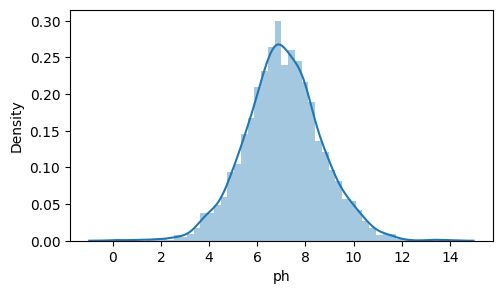

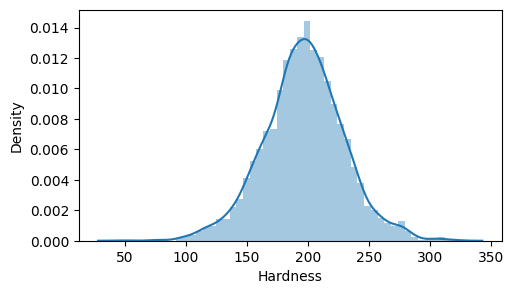

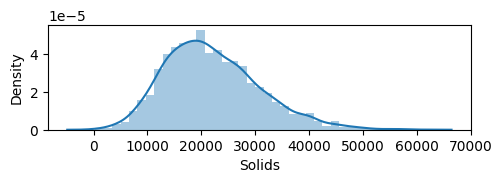

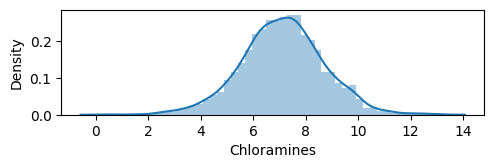

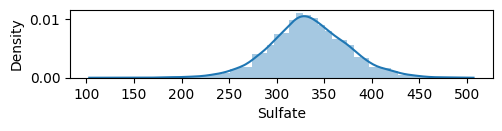

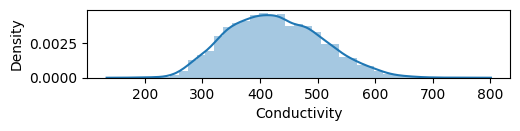

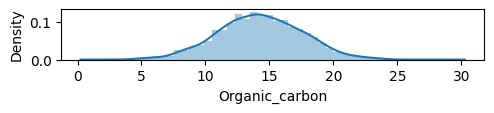

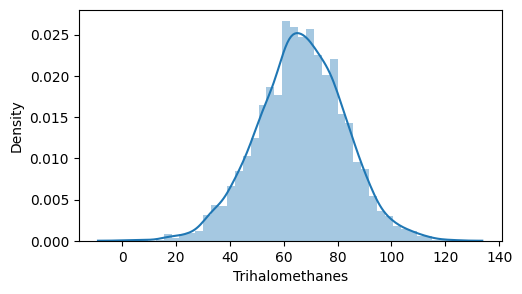

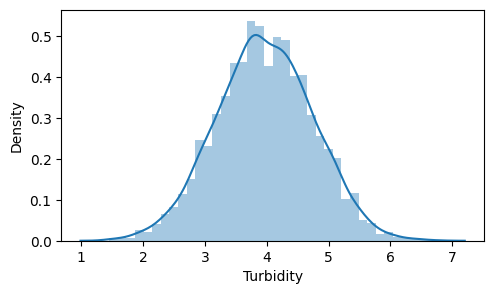

In [ ]:
import seaborn as sns

plt.figure(figsize = (12, 3))
plt.subplot(1, 2, 1)
sns.distplot(df['ph'])

plt.figure(figsize = (12, 3))
plt.subplot(1, 2, 2)
sns.distplot(df['Hardness'])

plt.figure(figsize = (12, 3))
plt.subplot(2, 2, 1)
sns.distplot(df['Solids'])

plt.figure(figsize = (12, 3))
plt.subplot(2, 2, 2)
sns.distplot(df['Chloramines'])

plt.figure(figsize = (12, 3))
plt.subplot(3, 2, 1)
sns.distplot(df['Sulfate'])

plt.figure(figsize = (12, 3))
plt.subplot(3, 2, 2)
sns.distplot(df['Conductivity'])

plt.figure(figsize = (12, 3))
plt.subplot(4, 2, 1)
sns.distplot(df['Organic_carbon'])

plt.figure(figsize = (12, 3))
plt.subplot(1, 2, 1)
sns.distplot(df['Trihalomethanes'])

plt.figure(figsize = (12, 3))
plt.subplot(1, 2, 1)
sns.distplot(df['Turbidity'])

In [ ]:
print("Mean value of ph",df['ph'].mean())
print("Std value of ph",df['ph'].std())
print("Min value of ph",df['ph'].min())
print("Max value of ph",df['ph'].max())


print("Mean value of Hardness",df['Hardness'].mean())
print("Std value of Hardness",df['Hardness'].std())
print("Min value of Hardness",df['Hardness'].min())
print("Max value of Hardness",df['Hardness'].max())


print("Mean value of Chloramines",df['Chloramines'].mean())
print("Std value of Chloramines",df['Chloramines'].std())
print("Min value of Chloramines",df['Chloramines'].min())
print("Max value of Chloramines",df['Chloramines'].max())


print("Mean value of Sulfate",df['Sulfate'].mean())
print("Std value of Sulfate",df['Sulfate'].std())
print("Min value of Sulfate",df['Sulfate'].min())
print("Max value of Sulfate",df['Sulfate'].max())


print("Mean value of Conductivity",df['Conductivity'].mean())
print("Std value of Conductivity",df['Conductivity'].std())
print("Min value of Conductivity",df['Conductivity'].min())
print("Max value of Conductivity",df['Conductivity'].max())

print("Mean value of Organic_carbon",df['Organic_carbon'].mean())
print("Std value of Organic_carbon",df['Organic_carbon'].std())
print("Min value of Organic_carbon",df['Organic_carbon'].min())
print("Max value of Organic_carbon",df['Organic_carbon'].max())


print("Mean value of Trihalomethanes",df['Trihalomethanes'].mean())
print("Std value of Trihalomethanes",df['Trihalomethanes'].std())
print("Min value of Trihalomethanes",df['Trihalomethanes'].min())
print("Max value of Trihalomethanes",df['Trihalomethanes'].max())

print("Mean value of Turbidity",df['Turbidity'].mean())
print("Std value of Turbidity",df['Turbidity'].std())
print("Min value of Turbidity",df['Turbidity'].min())
print("Max value of Turbidity",df['Turbidity'].max())



Mean value of ph 7.080794504276835
Std value of ph 1.5943195187088104
Min value of ph 0.0
Max value of ph 13.999999999999998
Mean value of Hardness 196.36949601730151
Std value of Hardness 32.879761476294156
Min value of Hardness 47.432
Max value of Hardness 323.124
Mean value of Chloramines 7.122276793425786
Std value of Chloramines 1.5830848890397096
Min value of Chloramines 0.3520000000000003
Max value of Chloramines 13.127000000000002
Mean value of Sulfate 333.7757766108135
Std value of Sulfate 41.416840461672706
Min value of Sulfate 129.00000000000003
Max value of Sulfate 481.0306423059972
Mean value of Conductivity 426.20511068255325
Std value of Conductivity 80.8240640511118
Min value of Conductivity 181.483753985146
Max value of Conductivity 753.3426195583046
Mean value of Organic_carbon 14.284970247677318
Std value of Organic_carbon 3.308161999126874
Min value of Organic_carbon 2.1999999999999886
Max value of Organic_carbon 28.30000000000001
Mean value of Trihalomethanes 66.39

In [ ]:
print("Highest allowed",df['ph'].mean() + 3*df['ph'].std())
print("Lowest allowed",df['ph'].mean() - 3*df['ph'].std())

Highest allowed 11.863753060403265
Lowest allowed 2.2978359481504045


In [ ]:
df[(df['ph'] > 11.86) | (df['ph'] < 2.29)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
80,1.844538,233.764343,28689.595778,7.724432,NaN,410.387264,15.611859,54.299444,5.013463,0
263,13.175402,47.432000,19237.949676,8.907020,375.147315,500.245952,12.083896,NaN,4.106924,1
692,1.757037,147.581831,41538.242730,7.728177,376.012933,428.444823,10.828696,65.005840,2.967554,1
726,0.227499,152.530111,39028.599340,3.462492,283.693782,443.029232,13.201943,62.322711,3.545741,1
783,11.898078,228.132673,8296.550611,9.899637,346.649750,500.169210,15.486862,63.529460,3.024968,1
810,0.989912,133.216942,16922.853899,9.293289,444.375731,322.291191,10.430076,43.578466,5.160604,1
1303,12.246928,217.368014,11318.140563,8.465160,375.894758,347.653054,9.762505,73.832405,3.533243,0
2075,14.000000,235.677458,24008.992040,5.635029,381.097711,460.745267,13.452538,72.859468,3.170994,0
2646,11.907740,298.098679,17083.175085,5.878993,NaN,400.330798,14.063370,64.368593,4.256415,0
2868,13.541240,187.606792,13475.912773,6.756055,NaN,411.264465,15.142667,74.448559,3.529191,0


In [ ]:
df['Sulfate'].skew()

-0.03594662160706187

In [ ]:
print(df['Solids'].skew())
print(df['Conductivity'].skew())
print(df['Trihalomethanes'].skew())
print(df['Chloramines'].skew())

0.6216344855169127
0.2644902239264119
-0.08303067407901553
-0.01209844012438221


In [ ]:
upper_limit_ph = df['ph'].mean() + 3*df['ph'].std()
lower_limit_ph = df['ph'].mean() - 3*df['ph'].std()

upper_limit_Hardness = df['Hardness'].mean() + 3*df['Hardness'].std()
lower_limit_Hardness = df['Hardness'].mean() - 3*df['Hardness'].std()

upper_limit_Chloramines = df['Chloramines'].mean() + 3*df['Chloramines'].std()
lower_limit_Chloramines = df['Chloramines'].mean() - 3*df['Chloramines'].std()

upper_limit_Sulfate = df['Sulfate'].mean() + 3*df['Sulfate'].std()
lower_limit_Sulfate = df['Sulfate'].mean() - 3*df['Sulfate'].std()

# upper_limit_Conductivity = df['Conductivity'].mean() + 3*df['Conductivity'].std()
# lower_limit_Conductivity = df['Conductivity'].mean() - 3*df['Conductivity'].std()

upper_limit_Organic_carbon = df['Organic_carbon'].mean() + 3*df['Organic_carbon'].std()
lower_limit_Organic_carbon = df['Organic_carbon'].mean() - 3*df['Organic_carbon'].std()

upper_limit_Trihalomethanes = df['Trihalomethanes'].mean() + 3*df['Trihalomethanes'].std()
lower_limit_Trihalomethanes = df['Trihalomethanes'].mean() - 3*df['Trihalomethanes'].std()

upper_limit_Turbidity = df['Turbidity'].mean() + 3*df['Turbidity'].std()
lower_limit_Turbidity = df['Turbidity'].mean() - 3*df['Turbidity'].std()

upper_limit_Solids = df['Solids'].mean() + 3*df['Solids'].std()
lower_limit_Solids = df['Solids'].mean() - 3*df['Solids'].std()

In [ ]:
df['ph'] = np.where(
    df['ph']>upper_limit_ph,
    upper_limit_ph,
    np.where(
        df['ph']<lower_limit_ph,
        lower_limit_ph,
        df['ph']
    )
)



df['Hardness'] = np.where(
    df['Hardness']>upper_limit_Hardness,
    upper_limit_Hardness,
    np.where(
        df['Hardness']<lower_limit_Hardness,
        lower_limit_Hardness,
        df['Hardness']
    )
)



df['Chloramines'] = np.where(
    df['Chloramines']>upper_limit_Chloramines,
    upper_limit_Chloramines,
    np.where(
        df['Chloramines']<lower_limit_Chloramines,
        lower_limit_Chloramines,
        df['Chloramines']
    )
)


# df['Conductivity'] = np.where(
#     df['Conductivity']>upper_limit_Conductivity,
#     upper_limit_Conductivity,
#     np.where(
#         df['Conductivity']<lower_limit_Conductivity,
#         lower_limit_Conductivity,
#         df['Conductivity']
#     )
# )

df['Organic_carbon'] = np.where(
    df['Organic_carbon']>upper_limit_Organic_carbon,
    upper_limit_Organic_carbon,
    np.where(
        df['Organic_carbon']<lower_limit_Organic_carbon,
        lower_limit_Organic_carbon,
        df['Organic_carbon']
    )
)



df['Trihalomethanes'] = np.where(
    df['Trihalomethanes']>upper_limit_Trihalomethanes,
    upper_limit_Trihalomethanes,
    np.where(
        df['Trihalomethanes']<lower_limit_Trihalomethanes,
        lower_limit_Trihalomethanes,
        df['Trihalomethanes']
    )
)



df['Sulfate'] = np.where(
    df['Sulfate']>upper_limit_Sulfate,
    upper_limit_Sulfate,
    np.where(
        df['Sulfate']<lower_limit_Sulfate,
        lower_limit_Sulfate,
        df['Sulfate']
    )
)


df['Turbidity'] = np.where(
    df['Turbidity']>upper_limit_Turbidity,
    upper_limit_Turbidity,
    np.where(
        df['Turbidity']<lower_limit_Turbidity,
        lower_limit_Turbidity,
        df['Turbidity']
    )
)


# df['Solids'] = np.where(
#     df['Solids']>upper_limit_Solids,
#     upper_limit_Solids,
#     np.where(
#         df['Solids']<lower_limit_Solids,
#         lower_limit_Solids,
#         df['Solids']
#     )
# )

In [ ]:
df['ph'].fillna(df['ph'].median(), inplace = True)
df['Sulfate'].fillna(df['Sulfate'].median(), inplace = True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace = True)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Potability', axis = 1), df['Potability'], test_size = 0.2) # 0.3

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
X_train_trf.shape

(2620, 9)

In [ ]:
# df.duplicated().sum()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.regularizers import l2

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=9, kernel_regularizer=l2(0.02)))#0.02
#model.add(Dense(64,activation='relu',input_dim=9))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20, #20/30/40
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(X_train_trf,y_train,epochs=250,validation_split=0.3, callbacks = callback, verbose = 1)

Epoch 1/250
58/58 [==============================] - 3s 16ms/step - loss: 0.9862 - accuracy: 0.5537 - val_loss: 0.9229 - val_accuracy: 0.5845
Epoch 2/250
58/58 [==============================] - 1s 11ms/step - loss: 0.8981 - accuracy: 0.5990 - val_loss: 0.8557 - val_accuracy: 0.5985
Epoch 3/250
58/58 [==============================] - 1s 9ms/step - loss: 0.8300 - accuracy: 0.6121 - val_loss: 0.8057 - val_accuracy: 0.6036
Epoch 4/250
58/58 [==============================] - 0s 4ms/step - loss: 0.7820 - accuracy: 0.6148 - val_loss: 0.7665 - val_accuracy: 0.6048
Epoch 5/250
58/58 [==============================] - 0s 3ms/step - loss: 0.7474 - accuracy: 0.6230 - val_loss: 0.7389 - val_accuracy: 0.6048
Epoch 6/250
58/58 [==============================] - 0s 3ms/step - loss: 0.7129 - accuracy: 0.6367 - val_loss: 0.7173 - val_accuracy: 0.6112
Epoch 7/250
58/58 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.6318 - val_loss: 0.7007 - val_accuracy: 0.6163
Epoch 8/250

In [ ]:
y_pred = model.predict(X_test_trf)

21/21 [==============================] - 0s 2ms/step


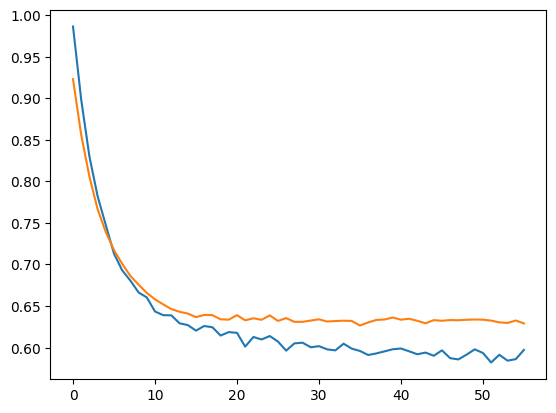

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

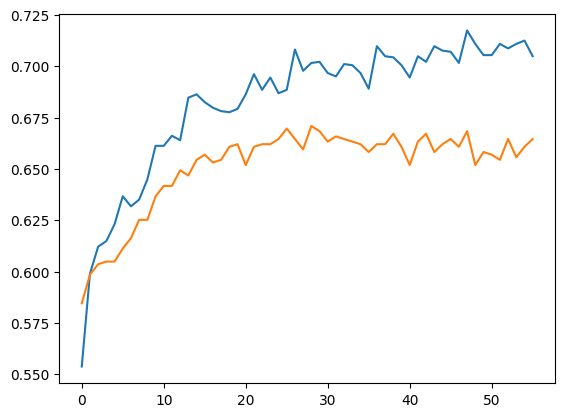

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
yPredicted=np.where(y_pred > 0.5, 1, 0)

In [ ]:
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, mean_absolute_error

print(classification_report(y_test,yPredicted))

print("Mean Square Error:", mean_squared_error(y_test, yPredicted))
print("Mean Absolute Error:", mean_absolute_error(y_test, yPredicted))

              precision    recall  f1-score   support

           0       0.64      0.87      0.74       389
           1       0.62      0.30      0.40       267

    accuracy                           0.64       656
   macro avg       0.63      0.58      0.57       656
weighted avg       0.63      0.64      0.60       656

Mean Square Error: 0.36128048780487804
Mean Absolute Error: 0.36128048780487804


Text(33.22222222222222, 0.5, 'Truth')

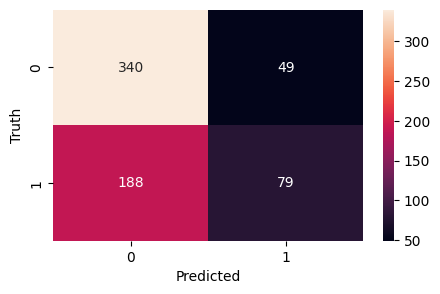

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=yPredicted)
import seaborn as sn
plt.figure(figsize = (5,3))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')